<a href="https://colab.research.google.com/github/Jushef/Proyectos-ML-DL/blob/main/Unsupervised%20Learning/Dimensionality%20reduction/PortfolioManagementEigenPortfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Gestión de carteras - Cartera propia**

En este proyecto utilizamos técnicas de reducción de la dimensionalidad para la gestión y asignación de carteras.


## **Contenido**

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Data Transformation](#3.2)  
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train Test Split](#4.1)
    * [5.2. Model Evaluation- Applying Principle Component Analysis](#4.2)
        * [5.2.1. Explained Variance using PCA](#4.2.1)
        * [5.2.2. Looking at Portfolio weights](#4.2.2)
        * [5.2.3. Finding the Best Eigen Portfolio](#4.2.3)
        * [5.2.4. Backtesting Eigenportfolio](#4.2.4)

<a id='0'></a>
# 1. Problem Definition

Nuestro objetivo en este proyecto es maximizar los rendimientos ajustados al riesgo utilizando un algoritmo basado en la reducción de la dimensionalidad en un conjunto de datos de acciones para asignar el capital en diferentes clases de activos.

El conjunto de datos utilizado para este estudio de caso es el índice Dow Jones Industrial Average (DJIA) y sus respectivos 30 valores desde el año 2000. El conjunto de datos puede descargarse de yahoo finance.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [ ]:
# Carga de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Importar paquetes de modelos 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

<a id='1.2'></a>
## 2.2. Loading the Data

In [ ]:
# cargar conjunto de datos
dataset = read_csv('/content/Dow_adjcloses.csv',index_col=0)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [ ]:
# forma
dataset.shape

(4804, 30)

In [ ]:
# consultar los datos
set_option('display.width', 100)
dataset.head(5)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,NaN,23.862240,72.316570,45.143382,81.449761,28.525123,28.584797,26.862510,24.393585,32.896986,38.135101,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,NaN,23.405167,67.763517,40.510629,78.683277,27.193951,27.536780,26.280065,23.888848,31.739292,36.846046,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,NaN,24.569179,65.257700,42.761219,81.449761,27.748059,27.964669,26.116927,24.393585,33.198570,37.235380,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,NaN,25.958680,67.354070,41.549363,80.045454,25.820155,28.699520,26.487695,23.931935,33.261805,35.988857,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,NaN,25.882501,67.607927,43.973075,79.694378,26.885748,29.921172,26.973402,24.547469,36.452760,36.459983,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805


In [ ]:
# tipos de datos
set_option('display.max_rows', 500)
dataset.dtypes

MMM     float64
AXP     float64
AAPL    float64
BA      float64
CAT     float64
CVX     float64
CSCO    float64
KO      float64
DIS     float64
DWDP    float64
XOM     float64
GS      float64
HD      float64
IBM     float64
INTC    float64
JNJ     float64
JPM     float64
MCD     float64
MRK     float64
MSFT    float64
NKE     float64
PFE     float64
PG      float64
TRV     float64
UTX     float64
UNH     float64
VZ      float64
V       float64
WMT     float64
WBA     float64
dtype: object

In [ ]:
# describir los datos
set_option('precision', 3)
dataset.describe()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
count,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,363.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,2741.000,4804.000,4804.000
mean,86.769,49.659,49.107,85.482,56.697,61.735,21.653,24.984,46.368,64.897,54.741,132.889,57.416,104.716,22.284,61.493,41.503,59.954,35.652,31.983,23.724,20.737,49.960,55.961,62.209,64.418,27.193,53.323,50.767,41.697
std,53.942,22.564,55.020,79.085,34.663,31.714,10.074,10.611,32.733,5.768,20.687,52.331,49.243,38.764,10.141,31.651,23.723,44.645,13.826,21.984,20.988,7.630,19.769,34.644,32.627,62.920,11.973,37.647,17.040,19.937
min,25.140,8.713,0.828,17.463,9.247,17.566,6.842,11.699,11.018,49.090,19.491,45.648,14.067,39.242,8.725,21.316,9.839,7.974,14.675,11.908,2.595,8.041,16.204,13.287,14.521,5.175,11.210,9.846,30.748,17.317
25%,51.192,34.079,3.900,37.407,26.335,31.820,14.910,15.420,22.044,62.250,33.381,85.301,25.463,67.954,15.329,39.209,26.374,20.736,25.826,19.158,8.037,15.031,35.414,29.907,34.328,23.498,17.434,18.959,38.062,27.704
50%,63.514,42.274,23.316,58.437,53.048,56.942,18.578,20.563,29.521,66.586,57.193,134.273,30.784,94.119,18.516,47.142,33.032,44.425,30.952,22.477,14.147,18.643,46.735,39.824,55.715,42.924,21.556,45.207,42.782,32.706
75%,122.906,66.816,84.007,112.996,76.488,91.688,24.650,34.927,75.833,69.143,73.712,166.303,72.425,143.030,28.142,85.587,50.476,83.752,46.784,36.172,36.545,25.403,68.135,80.767,92.557,73.171,38.996,76.966,65.076,58.165
max,251.981,112.421,231.260,411.110,166.832,128.680,63.698,50.400,117.973,75.261,88.852,270.419,212.616,178.294,56.023,147.840,116.850,188.510,78.774,115.106,85.300,45.841,98.030,146.564,141.280,286.330,60.016,150.525,107.010,90.188


<a id='2.2'></a>
## 3.2. Data Visualization

Observación de la correlación. Una mirada más detallada a los datos se realizará después de implementar los modelos de reducción de la dimensionalidad.

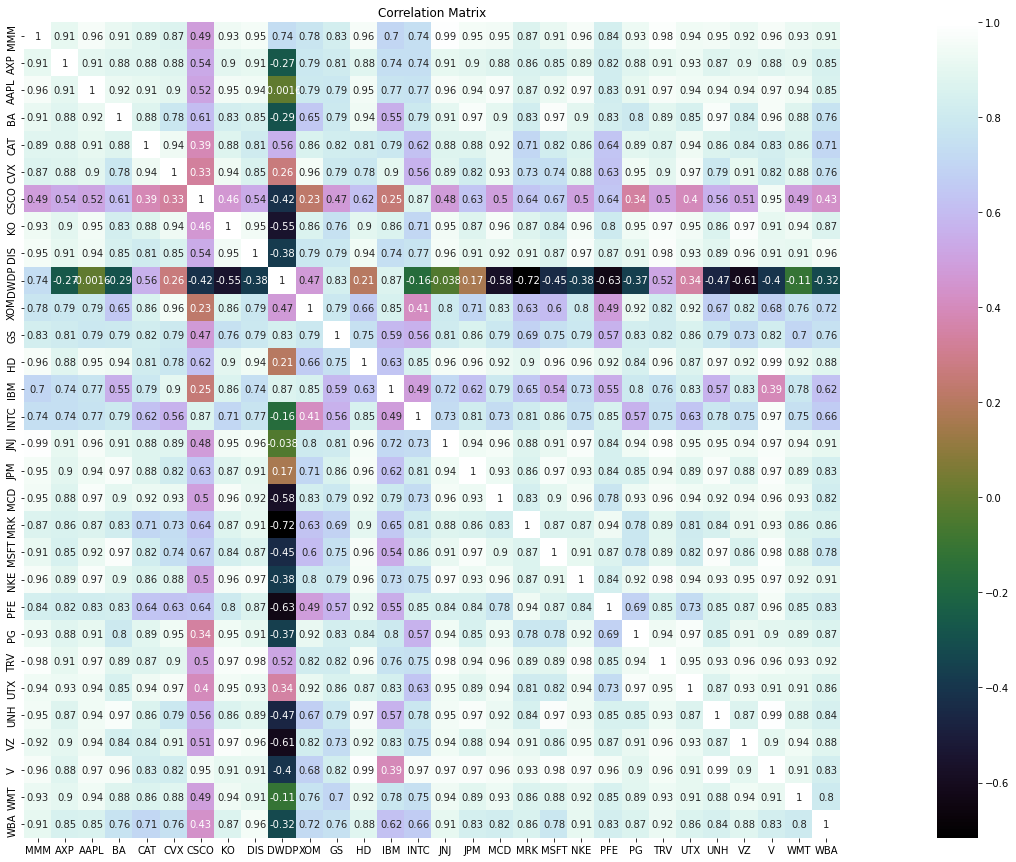

In [ ]:
# correlación
correlation = dataset.corr()
plt.figure(figsize=(30,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

* Como puede verse en el gráfico anterior, existe una correlación positiva significativa entre los valores.

<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Comprobemos los NA en las filas, o bien los eliminamos o los rellenamos con la media de la columna.

In [ ]:
# Comprobación de los valores nulos y eliminación de los mismos'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


* Eliminaremos las columnas con más de un 30% de valores perdidos.

In [ ]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

DWDP    0.924
V       0.429
MMM     0.000
JPM     0.000
WMT     0.000
VZ      0.000
UNH     0.000
UTX     0.000
TRV     0.000
PG      0.000
dtype: float64

In [ ]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(4804, 28)

* Dado que hay valores nulos, se elimina la raíz que contiene los valores nulos.

In [ ]:
# Rellenar los valores que faltan con el último valor disponible en el conjunto de datos. 
dataset=dataset.fillna(method='ffill')

# Eliminar las filas que contienen NA
dataset= dataset.dropna(axis=0)

dataset.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847,35.477,3.531,26.65,14.561,21.582,43.004,16.984,23.522,23.862,72.317,45.143,81.450,28.525,28.585,26.863,24.394,32.897,38.135,4.701,16.747,32.228,20.159,21.319,5.841,22.564,47.338,21.713
2000-01-04,28.661,34.134,3.233,26.61,14.372,21.582,40.577,17.041,24.900,23.405,67.764,40.511,78.683,27.194,27.537,26.280,23.889,31.739,36.846,4.445,16.122,31.596,19.890,20.446,5.766,21.834,45.566,20.907


Cálculo de la rentabilidad diaria

In [ ]:
# Rendimiento lineal diario (%)
datareturns = dataset.pct_change(1)

# Eliminar los valores atípicos de más de 3 desviaciones estándar
datareturns= datareturns[datareturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]

<a id='3.2'></a>
## 4.2. Data Transformation

Todas las variables deben estar en la misma escala antes de aplicar el PCA, de lo contrario una característica con valores grandes dominará el resultado. A continuación utilizamos StandardScaler en sklearn para estandarizar las características del conjunto de datos en la escala de la unidad (media = 0 y varianza = 1).

La estandarización es una técnica útil para transformar los atributos a una distribución normal estándar con una media de 0 y una desviación estándar de 1

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(datareturns)
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns),columns = datareturns.columns, index = datareturns.index)

# resumir los datos transformados
datareturns.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-1.713,0.566,-2.708,-1.133,-1.041,-0.787,-1.834,3.569,0.725,0.981,0.290,-1.837,0.694,2.698,-0.040,-1.465,2.121,0.025,-1.936,3.667,-0.173,1.772,-0.936,-1.954,0.076,-0.836,-1.375,2.942
2000-01-20,-3.564,1.077,3.304,-1.670,-2.834,-0.446,0.022,0.987,-2.415,-1.897,-1.069,-1.243,-0.413,-2.664,0.344,-0.077,0.336,1.608,-0.733,-1.816,-1.421,-2.742,-0.476,-1.916,1.654,0.241,-0.987,-0.036


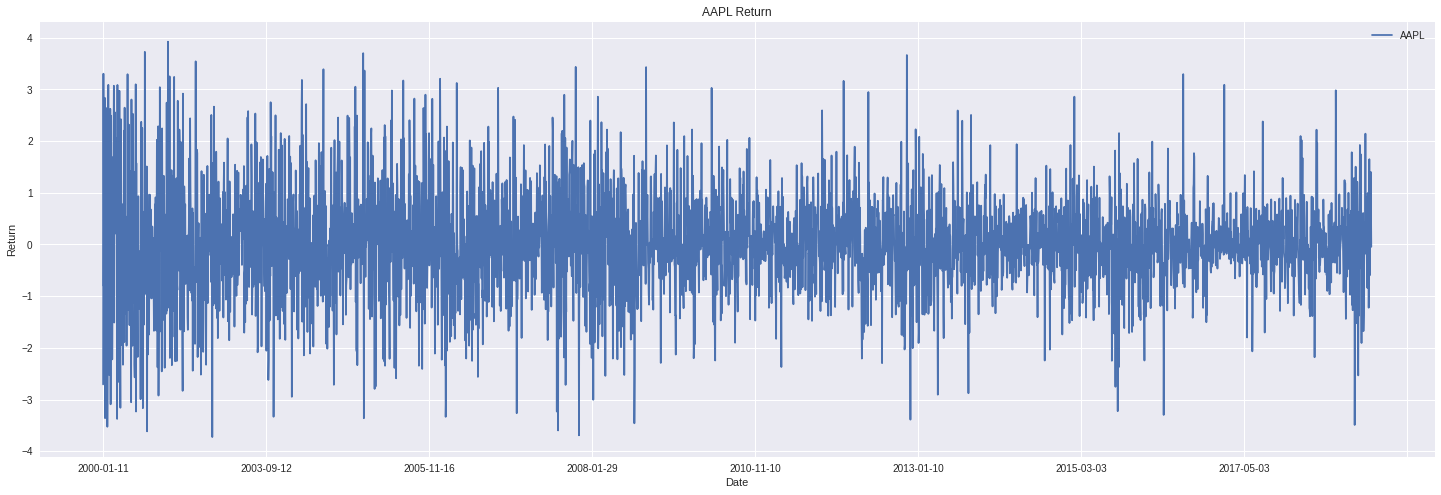

In [ ]:
# Visualización de las rentabilidades del DJIA 
from pylab import rcParams
plt.style.use('seaborn')
rcParams['figure.figsize'] = (25,8)

plt.title("AAPL Return")
plt.ylabel("Return")
rescaledDataset.AAPL.plot()
plt.grid(True);
plt.legend()
plt.show()

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

La cartera se divide en una parte de entrenamiento y otra de prueba para realizar el análisis de la mejor cartera y el backtesting que se muestra más adelante.

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y de prueba
percentage = int(len(rescaledDataset) * 0.8)
X_train = rescaledDataset[:percentage]
X_test = rescaledDataset[percentage:]

X_train_raw = datareturns[:percentage]
X_test_raw = datareturns[percentage:]


stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)

<a id='4.2'></a>
## 5.2. Model Evaluation- Applying Principle Component Analysis

Como este paso, creamos una función para calcular el análisis de componentes principales desde sklearn. Esta función calcula un gráfico de codo invertido que muestra la cantidad de componentes principales y cuántos de ellos explican el umbral de varianza.

In [ ]:
pca = PCA()
PrincipalComponent=pca.fit(X_train)

### **First Principal Component /Eigenvector**

In [ ]:
pca.components_[0]

array([-0.2278224 , -0.22835766, -0.15302828, -0.18969933, -0.20200012,
       -0.17810558, -0.19508121, -0.16845303, -0.20820442, -0.19308548,
       -0.20879404, -0.20231768, -0.19939638, -0.19521427, -0.16686975,
       -0.22806024, -0.15153408, -0.169941  , -0.19367262, -0.17118841,
       -0.18993347, -0.16805969, -0.197612  , -0.22658993, -0.13821257,
       -0.16688803, -0.16897835, -0.16070821])

<a id='4.2.1'></a>
## 5.2.1.Explained Variance using PCA

,Explained Variance
0,37.03%
1,42.75%
2,47.10%
3,51.08%
4,54.60%
5,57.74%
6,60.65%
7,63.44%
8,66.18%
9,68.71%


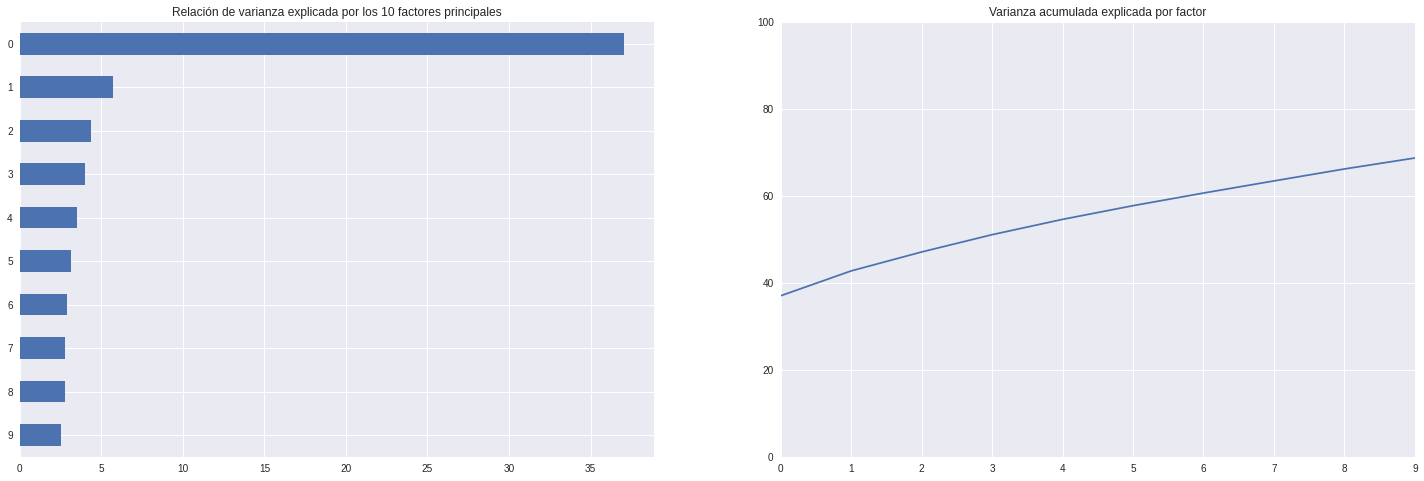

In [ ]:
NumEigenvalues=10
fig, axes = plt.subplots(ncols=2)
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="woohoo",title='Relación de varianza explicada por los 10 factores principales',ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title='Varianza acumulada explicada por factor');

# variación_explicada
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

* Encontramos que el factor más importante explica alrededor del 40% de la variación de la rentabilidad diaria. El factor dominante suele interpretarse como "el mercado", según los resultados de una inspección más detallada.

* El gráfico de la derecha muestra la varianza explicada acumulada e indica que unos 10 factores explican el 73% de los rendimientos de esta amplia sección transversal de valores.

<a id='4.2.2'></a>
## 5.2.2.Looking at Portfolio weights

Calculamos varias funciones para determinar los pesos de cada componente principal. A continuación, visualizamos un gráfico de dispersión que muestra un gráfico descendente organizado con el peso respectivo de cada empresa en el componente principal elegido en ese momento.

In [ ]:
def PCWeights():
    '''
    Ponderación de los componentes principales (PC) para cada 28 PC
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

In [ ]:
weights[0]

array([0.04341287, 0.04351486, 0.02916042, 0.0361483 , 0.03849228,
       0.03393904, 0.03717385, 0.03209969, 0.03967455, 0.03679355,
       0.0397869 , 0.0385528 , 0.03799613, 0.0371992 , 0.03179799,
       0.04345819, 0.02887569, 0.03238323, 0.03690543, 0.03262094,
       0.03619291, 0.03202474, 0.0376561 , 0.04317801, 0.0263372 ,
       0.03180147, 0.0321998 , 0.03062387])

In [ ]:
pca.components_[0]

array([-0.2278224 , -0.22835766, -0.15302828, -0.18969933, -0.20200012,
       -0.17810558, -0.19508121, -0.16845303, -0.20820442, -0.19308548,
       -0.20879404, -0.20231768, -0.19939638, -0.19521427, -0.16686975,
       -0.22806024, -0.15153408, -0.169941  , -0.19367262, -0.17118841,
       -0.18993347, -0.16805969, -0.197612  , -0.22658993, -0.13821257,
       -0.16688803, -0.16897835, -0.16070821])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea12220b10>],
      dtype=object)

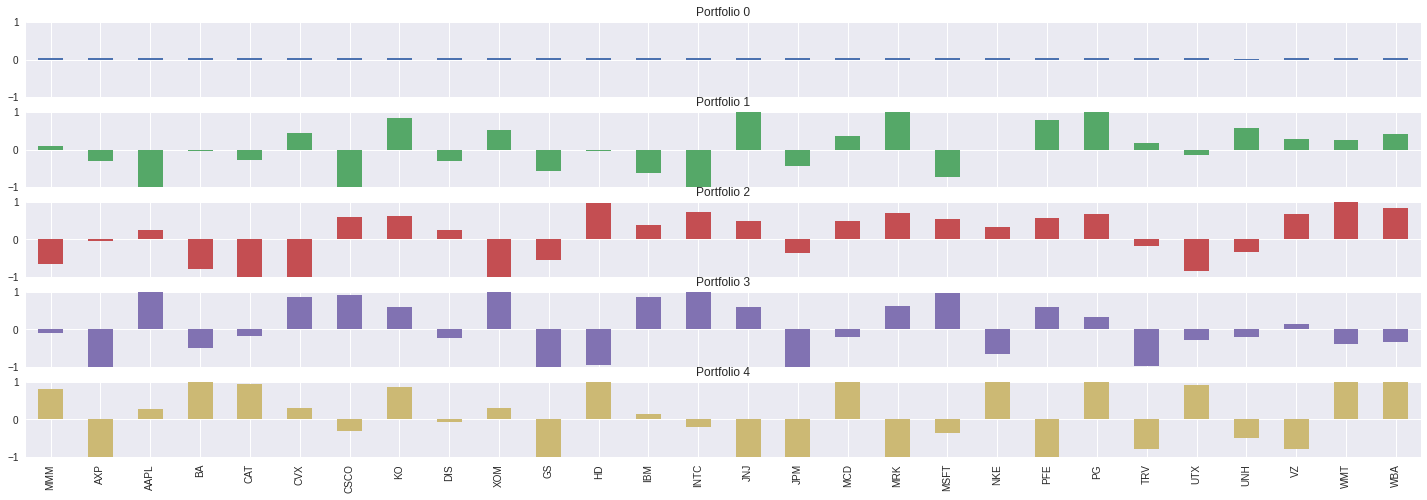

In [ ]:
NumComponents=5
        
topPortfolios = pd.DataFrame(pca.components_[:NumComponents], columns=dataset.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range( NumComponents)]
np.sqrt(pca.explained_variance_)
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents),1), legend=False, sharey=True, ylim= (-1,1))

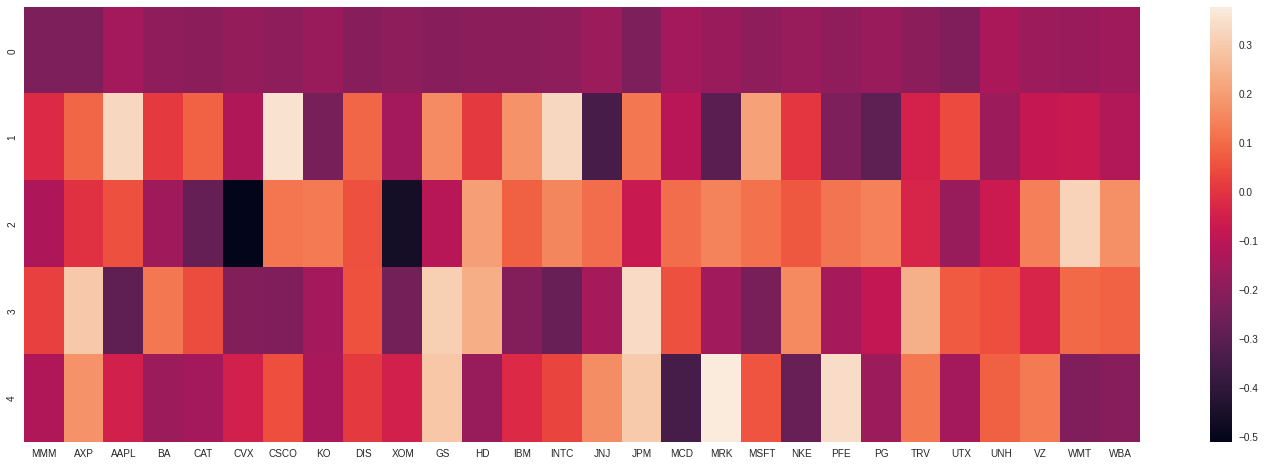

In [ ]:
# trazado del mapa de calor 
sns.heatmap(topPortfolios) 

* El mapa de calor y el gráfico anterior muestran la contribución de las diferentes poblaciones en cada vector propio.

<a id='4.2.3'></a>
## 5.2.3. Finding the Best Eigen Portfolio

Para encontrar las mejores carteras y realizar el backtesting en el siguiente paso, utilizamos el ratio de sharpe, que es una métrica de rendimiento que explica los rendimientos anualizados frente a la volatilidad anualizada de cada empresa de una cartera. Un ratio de sharpe alto explica una mayor rentabilidad y/o una menor volatilidad para la cartera especificada. El ratio de Sharpe anualizado se calcula dividiendo la rentabilidad anualizada entre la volatilidad anualizada. Para la rentabilidad anualizada se aplica la media geométrica de todas las rentabilidades con respecto a los periodos al año (días de operaciones en bolsa en un año). La volatilidad anualizada se calcula tomando la desviación estándar de los rendimientos y multiplicándola por la raíz cuadrada de los períodos al año.

In [ ]:
# Ratio de Sharpe
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    El ratio de Sharpe es la rentabilidad media obtenida por encima de la tasa libre de riesgo por unidad de volatilidad o riesgo total.
    Calcula la rentabilidad anualizada, la volatilidad anualizada y el ratio de Sharpe anualizado.
    
    ts_returns son los rendimientos de una cartera signle eigen.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

* Construimos un bucle para calcular las ponderaciones de los componentes principales de cada cartera propia, que luego utiliza la función de ratio de sharpe para buscar la cartera con el ratio de sharpe más alto. Una vez que sepamos qué cartera tiene el mayor ratio de sharpe, podemos visualizar su rendimiento frente al índice DJIA para compararlo.

Eigen portafolio #0 con el mayor Sharpe.  11.47%, vol = 13.31%, Sharpe = 0.86
    Return    Vol  Sharpe
0    0.115  0.133   0.862
7    0.096  0.693   0.138
5    0.100  0.845   0.118
1    0.057  0.670   0.084
2   -0.107  0.859  -0.124
11  -1.000  7.228  -0.138
13  -0.399  2.070  -0.193
25  -1.000  5.009  -0.200
23  -1.000  4.955  -0.202
6   -0.416  1.967  -0.212
10  -0.158  0.738  -0.213
3   -0.162  0.738  -0.220
26  -1.000  4.535  -0.220
8   -0.422  1.397  -0.302
17  -0.998  3.277  -0.305
24  -0.550  1.729  -0.318
16  -0.980  3.038  -0.323
21  -0.470  1.420  -0.331
14  -0.886  2.571  -0.345
27  -0.933  2.606  -0.358


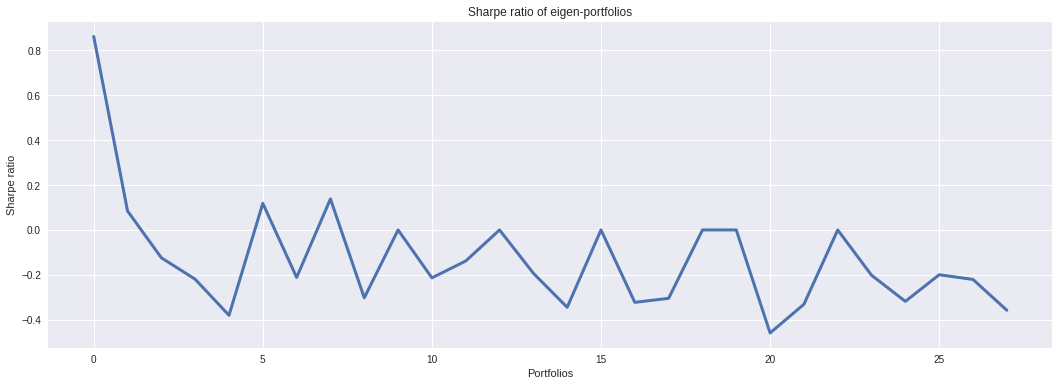

In [ ]:
def optimizedPortfolio():
    n_portfolios = len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 
    stock_tickers = rescaledDataset.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = pcs[i] / sum(pcs[i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_prti_returns = np.dot(X_train_raw.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_train_raw.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    # encontrar la cartera con el mayor ratio de Sharpe
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portafolio #%d con el mayor Sharpe.  %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(18, 6)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()

optimizedPortfolio()

* Como se desprende de los resultados anteriores, la cartera 12 es la mejor cartera y tiene el máximo ratio de agudeza de toda la cartera. Veamos la composición de esta cartera.

Suma de las ponderaciones de la cartera propia actual: 100.00


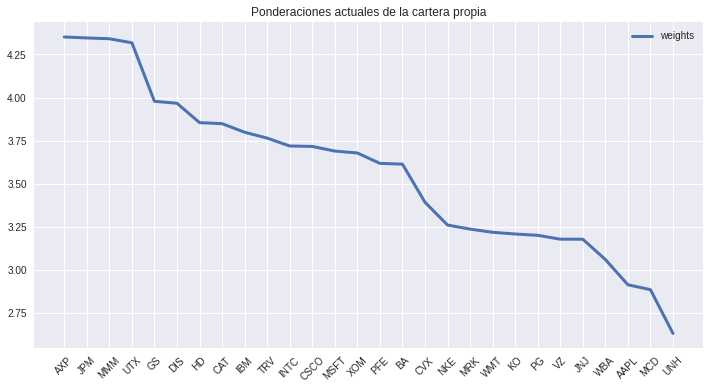

,weights
AXP,4.351
JPM,4.346
MMM,4.341
UTX,4.318
GS,3.979
DIS,3.967
HD,3.855
CAT,3.849
IBM,3.800
TRV,3.766


In [ ]:
weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Suma de las ponderaciones de la cartera propia actual: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Ponderaciones actuales de la cartera propia', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

# Los pesos se almacenan en matrices, donde 0 es el peso del primer PC.
plotEigen(weights=weights[0], plot=True)

* El gráfico muestra la asignación de la mejor cartera. Las ponderaciones del gráfico están en porcentajes.

<a id='4.2.4'></a>
## 5.2.4. Backtesting Eigenportfolio

Ahora intentaremos hacer una prueba retrospectiva de este algoritmo en el conjunto de pruebas, observando algunas carteras superiores e inferiores.

Cartera propia actual:
Return = 32.76%
Volatility = 68.64%
Sharpe = 0.48


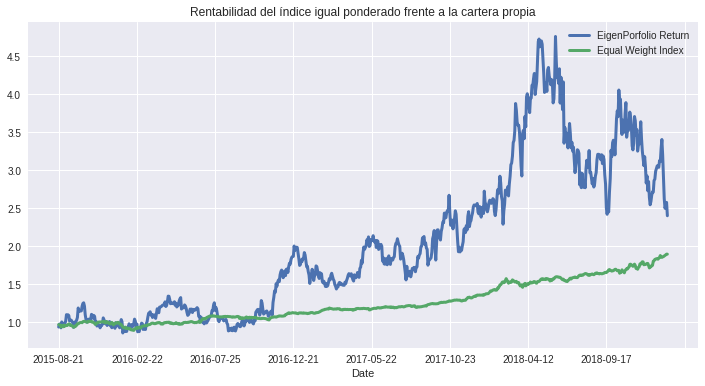

Cartera propia actual:
Return = 99.80%
Volatility = 58.34%
Sharpe = 1.71


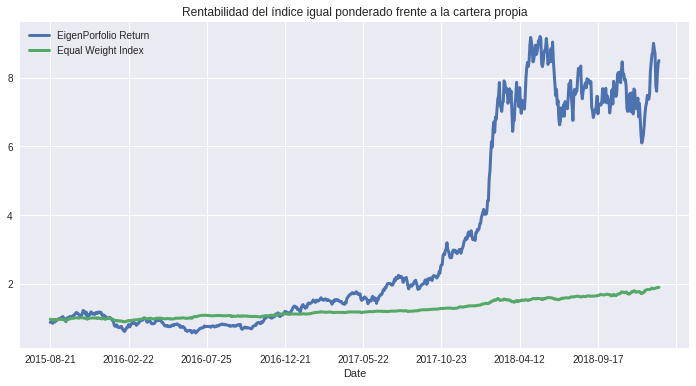

Cartera propia actual:
Return = -79.42%
Volatility = 185.30%
Sharpe = -0.43


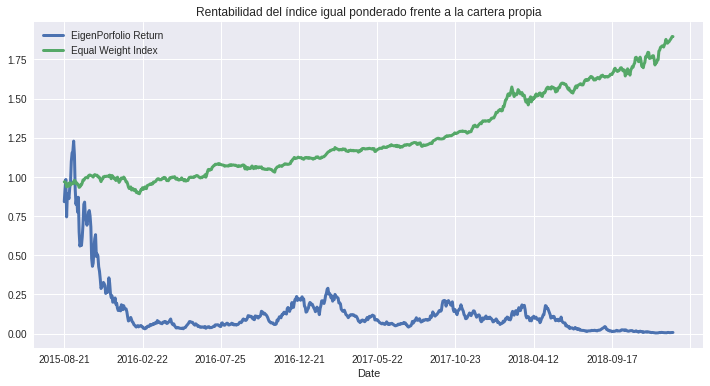

In [ ]:
def Backtest(eigen):

    '''

    Gráficos de los rendimientos de los componentes del Principio frente a los rendimientos reales.
    
    '''
   
    eigen_prtfi = pd.DataFrame(data ={'weights': eigen.squeeze()}, index = stock_tickers)
    eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)    

    eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test_raw.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)  
    print('Cartera propia actual:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    equal_weight_return=(X_test_raw * (1/len(pca.components_))).sum(axis=1)    
    df_plot = pd.DataFrame({'EigenPorfolio Return': eigen_portfolio_returns, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Rentabilidad del índice igual ponderado frente a la cartera propia' , 
                          figsize=(12,6), linewidth=3)
    plt.show()
    
Backtest(eigen=weights[5])
Backtest(eigen=weights[1])
Backtest(eigen=weights[14])

* Como se muestra en los gráficos anteriores, la rentabilidad de las carteras principales supera a la de las carteras igualmente ponderadas, mientras que la cartera con la clasificación 19 obtuvo un rendimiento inferior al del mercado en el conjunto de pruebas.

## **Conclusión**

En cuanto a la intuición que subyace a las carteras propias, vemos que la primera cartera propia representa un factor de riesgo sistemático y que otras carteras propias pueden representar un factor sectorial o industrial. Discutimos las ventajas de diversificación que ofrecen las carteras propias, ya que se derivan utilizando el ACP y son independientes.

Si se observa el resultado del backtesting, la cartera con el mejor resultado en el conjunto de entrenamiento conduce al mejor resultado en el conjunto de prueba. Mediante el uso de PCA, obtenemos carteras propias independientes con una mayor rentabilidad y un ratio más alto que el del mercado.